<h1>Normalização e Padronização Documentada</h1>
<h2>Registro e intervenção:</h2>
<h4>Esta etapa possui o objetivo de documentar os processos realizados,
referente a normalização e padronização dos dados nas variáveis.</h4><hr>

<body>

<p>Antes da normalização e padronização terem sido de fato executadas, foi realizado uma verificação
da integridade e qualidade dos dados. Isso se fez importante, pois etapas como verificação de possíveis dados ausentes ou nulos, identificação de valores inconsistentes ou fora do padrão esperado, verificação de registros duplicados e avaliação do tipo de dado foram essenciais para que se fosse definido quais dados seriam trabalhados.</p>

<h5>Tabelas Analisadas:</h5>

<ul>
<li>Categorias;</li>
<li>Clientes;</li>
<li>Produtos;</li>
<li>Unidades;</li>
<li>Vendas;</li>
<li>Vendedores.</li>
</ul>

<h5>Tabelas que não apresentam irregularidades</h5>
<ul>
<li>Categorias;</li>
<li>Unidades;</li>
<li>Vendedores.</li>
</ul>

<h5>Tabelas que apresentam valores ausentes e nulos</h5>
<ul>
<li>Clientes (12 colunas vazias e 7 colunas com Null presente)</li>
<li>Vendas (4 colunas vazias e 2 colunas com Null presente)</li>
</ul>

<h5>Tabelas que apresentam valor inconsistente</h5>
<ul>
<li>Produtos (alguns valores da coluna "preco_venda" estão zerados)</li>
</ul>

<h5>Tabelas com valores duplicados</h5>
<ul>
<li>Clientes (alguns valores das colunas C e D se repetem)</li>
</ul>
<br>

<h3>Ações Realizadas por Tabela</h3>
<p><strong>Clientes:</strong> Verificação dos dados ausentes, bem como eliminação ou consolidação dos registros.</p>
<p><strong>Vendas:</strong> Verificação de quais colunas estava com dados ausentes. Foi verificado o impacto na análise e o preenchimento com dados corretos ou remoção de linhas incompletas.</p>
<p><strong>Produtos:</strong> Correção de preços (mediante verificação da mesma).</p><hr>




</body>

<h2>Seleção das Variáveis Numéricas</h2>
<p>Segue código usado para carregar, selecionar e exibir as variáveis numéricas dos dataframes:</p>

<body>

<pre>
<code>
#carregamento das variáveis numericas dos dataframes

df_categorias = load(caminho+'df_categorias.z')
categorias_numerica= df_categorias.select_dtypes(include=['int64', 'float64']) # seleciona apenas as variaveis numericas do tipo int64 e float64

df_clientes = load(caminho+'df_clientes.z')
clientes_numerica = df_clientes.select_dtypes(include=["int64", "float64"])

df_produtos = load(caminho+'df_produtos.z')
produtos_numerica = df_produtos.select_dtypes(include=["int64", "float64"])

#exibe informações das variaveis numericas de cada dataframe
print('[CATEGORIAS]\n',categorias_numerica.describe())
print('[CLIENTES]\n',clientes_numerica.describe())
print('[PRODUTOS]\n',produtos_numerica.describe())
</code>
</pre>

<p><strong>Output</strong></p><br>
</body>


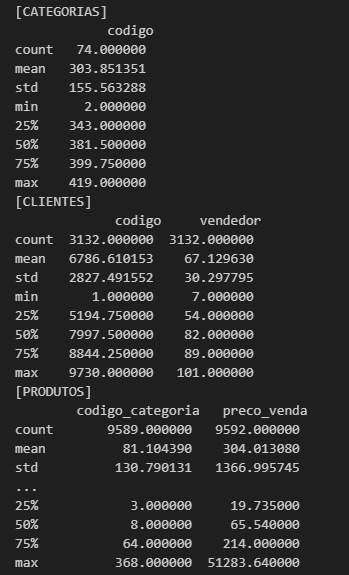

`categorias`: somente possui uma variável numérica para servir de id da categoria, será descartada

`clientes`: só possui variáveis que servem como identificadores ('codigo','vendedor'), serão descartados

`produtos`: também possui variáveis identificadoras ('codigo_categoria) que será descartada nos procedimentos. será necessário aplicar uma normalização em 'preco_venda' por apresentar valores muito distantes  

Após isso, houve um descarte da variávei codigo_categoria:
<pre>
<code>
# descartando variável codigo_categoria
produtos_numerica = produtos_numerica.drop(columns=['codigo_categoria'])
produtos_numerica.head(10)
</code>
</pre>
<hr>

<h2>Padronização com StandardScaler</h2>
<code>from sklearn.preprocessing import MinMaxScaler, StandardScaler</code> <br>° Importando os recursos necessários

<code>minmax = MinMaxScaler()<br>
produtos_numerica_minmax = minmax.fit_transform(produtos_numerica) 
</code>
<br>° Preparando  e treinamento para usar StandardScaler

<code>scaler = StandardScaler() # declarando o scaler<br>
produtos_numerica_std = scaler.fit_transform(produtos_numerica) # aplicando no produtos</code>

<h3>Inserindo a coluna ao lado</h3>
<code>df_produtos.insert(9, 'preco_venda_minmax', produtos_numerica_minmax)<br>
df_produtos.insert(10, 'preco_venda_std', produtos_numerica_std)<br>
df_produtos[['preco_venda', 'preco_venda_minmax', 'preco_venda_std']].head(10)</code>
<p><strong>Output</strong></p>

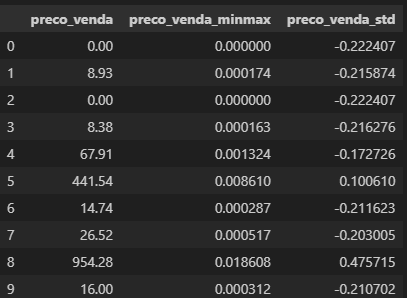<br><br>
<code>dump(df_produtos, caminho+'df_produtos.z')</code><br>


<h4>As ações acima são referentes aos produtos, <code>df_produtos</code>.<h4>

<h3>Para as unidades, usamos <code>(df_unidades)</code>;<h3>

<code>import pandas as pd</code><br>
<code>from sklearn.preprocessing import LabelEncoder</code><br>
° Importando bibliotecas necessárias para transformar dados categóricos em números

<code>df_unidades = pd.read_csv("../../util/data/unidades.csv")</code><br>

° Codificando a coluna 'status' (sim/não) em 1 e 0<br>
<code>df_unidades['status_cod'] = df_unidades['status'].map({'sim': 1, 'não': 0})</code>

° Codificando a coluna 'nome_fantasia' com Label Encoding<br>
<code>le = LabelEncoder()<br>
df_unidades.insert(2, 'nome_fantasia_cod', le.fit_transform(df_unidades['nome_fantasia']))</code>

° Visualização prévia<br>
<code>df_unidades.head()</code><br><br>
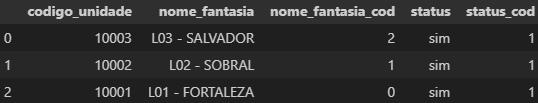

<code>dump(df_unidades, caminho+'df_unidades.z')</code><br><br>


<h3>Agora, a etapa de usar o LabelEncoder para o dataframe <code>df_vendedores</code>.<h3>

<code>from joblib import load<br>
df_vendedores = load("../../util/data/df_vendedores.z")</code><br><br>
° Vamos visualizar os dados como estão e, após isso, como ficaram após a transformação:

<code>df_vendedores</code><br><br>
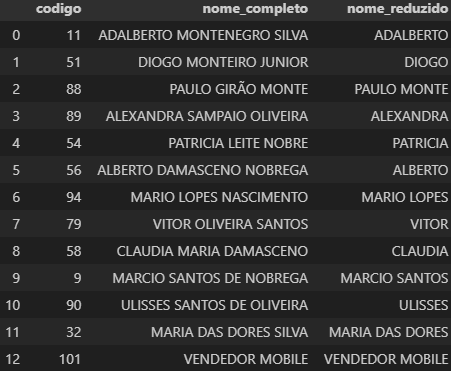

° Aplicando LabelEncoder em nome_completo e nome_reduzido: <br>
<code>le_completo = LabelEncoder()<br>
le_reduzido = LabelEncoder()<br>
<br>
df_vendedores.insert(2, 'nome_completo_cod', le_completo.fit_transform(df_vendedores['nome_completo']))<br>
df_vendedores.insert(4, 'nome_reduzido_cod', le_reduzido.fit_transform(df_vendedores['nome_reduzido']))</code>

<h4>Após as alterações:<h4>

<code>df_vendedores.head(3)</code><br><br>
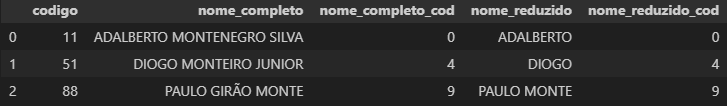

<code>dump(df_vendedores, caminho+'df_vendedores.z')</code><br><br>


<h3>Por fim, vamos acompanhar as alterações no dataframe <code>df_vendas</code>.<h3>

<code>from joblib import load<br>
df_vendas = load("../../util/data/df_vendas.z")<br>
print(df_vendas.info())</code>

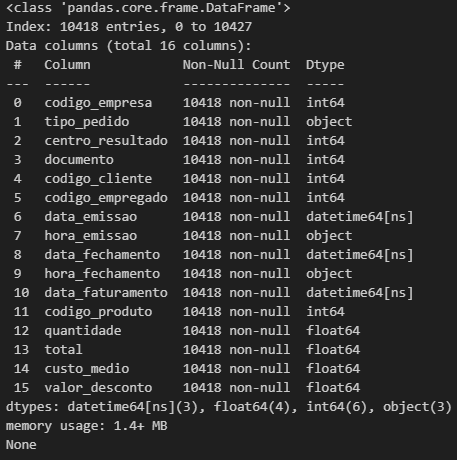

° Visualizando antes das alterações <br>
<code>df_vendas.head(3)</code>

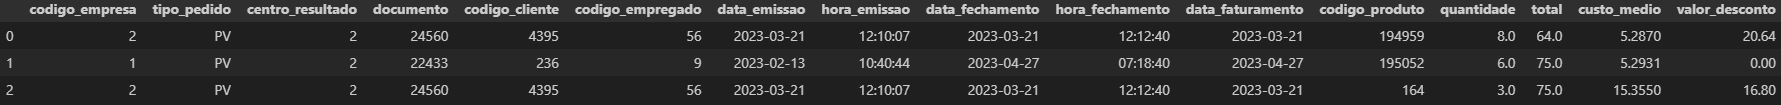

° Selecionamos as colunas numéricas relevantes<br>
<code>num_cols = ['quantidade', 'total', 'custo_medio', 'valor_desconto']</code>

° Inicializando os scalers<br>
<code>minmax = MinMaxScaler()<br>
zscore = StandardScaler()</code>

° Aplicando Min-Max Normalization<br>
<code>df_minmax = pd.DataFrame(<br>
    minmax.fit_transform(df_vendas[num_cols]),<br>
    columns=[col + '_minmax' for col in num_cols],<br>
    index=df_vendas.index<br>
)
</code>

<code>df_vendas.insert(13, 'quantidade_minmax', df_minmax['quantidade_minmax'])<br>
df_vendas.insert(15, 'total_minmax', df_minmax['total_minmax'])<br>
df_vendas.insert(17, 'custo_medio_minmax', df_minmax['custo_medio_minmax'])<br>
df_vendas.insert(19, 'valor_desconto_minmax', df_minmax['valor_desconto_minmax'])</code>

° Aplicando |-score Standardization<br>
<code>
df_zscore = pd.DataFrame(<br>
    zscore.fit_transform(df_vendas[num_cols]),<br>
    columns=[col + '_zscore' for col in num_cols],<br>
    index=df_vendas.index<br>
)
</code>

° Verificando as colunas presentes:<br><br>
<code>df_vendas.columns</code>

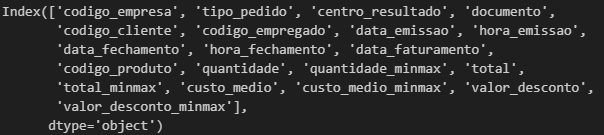

° Inserindo no dataframe:<br>
<code>df_vendas.insert(14, 'quantidade_zscore', df_zscore['quantidade_zscore'])<br>
df_vendas.insert(17, 'total_zscore', df_zscore['total_zscore'])<br>
df_vendas.insert(20, 'custo_medio_zscore', df_zscore['custo_medio_zscore'])<br>
df_vendas.insert(23, 'valor_desconto_zscore', df_zscore['valor_desconto_zscore'])
</code>

° One-hot encoding para tipo_pedido<br>
<code>df_vendas = pd.get_dummies(df_vendas, columns=['tipo_pedido'], prefix='pedido')</code>

° Verificando as colunas e seu Dtype:<br>
<code>print(df_vendas.info())</code>

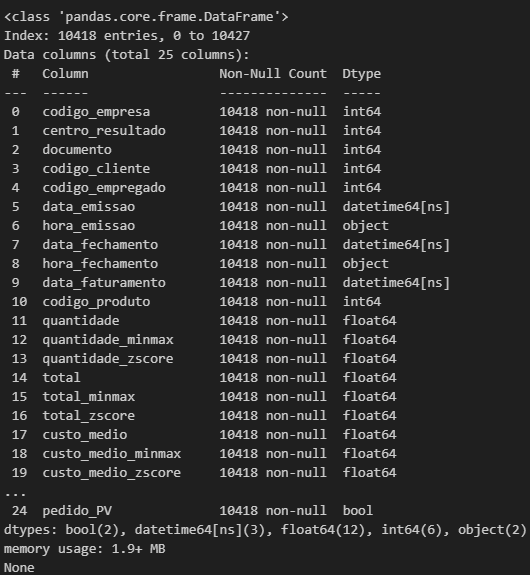

° Aplicando <code>.describe</code> no <code>df_vendas</code>:

<code>print(df_vendas.describe())</code>

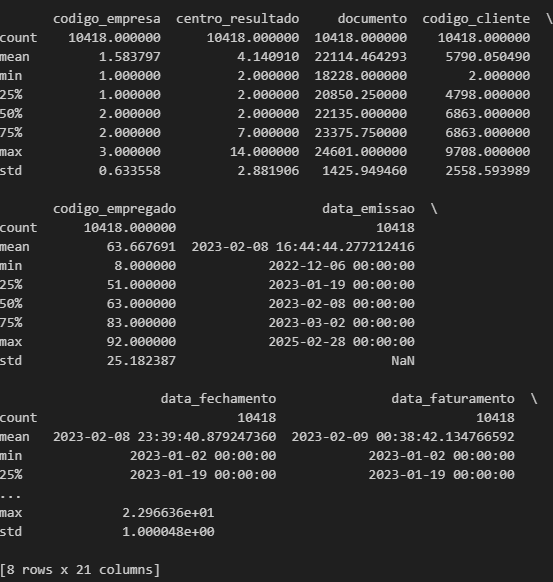

<code>dump(df_vendas, caminho+'df_vendas.z')</code>


<hr>